## **Spotify Wrapped: Detailed Overview.**


---



**Import the required libraries and modules.**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsv

import textwrap
from itertools import product

#### **Load the files.**

The data must be placed in the ```/spotify_data``` in order to be loaded.

In [44]:
import os

# Example assuming the folder is in the same directory as your notebook:
json_directory = "spotify_data" 

# Get a list of all JSON files in the directory that start with "Streaming_History_Audio_2025_"
json_files = [os.path.join(json_directory, f) 
              for f in os.listdir(json_directory) 
              if f.startswith("Streaming_History_Audio_2025_") and f.endswith(".json")]

# Read each JSON file into a DataFrame and concatenate them
df = pd.concat((pd.read_json(f) for f in json_files), ignore_index=True)

#### **Read the data.**

In [45]:
print("\n#### First 5 rows of the DataFrame: ####\n")
display(df.head())


#### First 5 rows of the DataFrame: ####



,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2025-01-06T23:56:34Z,android,4996,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy,spotify:track:7GgxAb6nyVReB3FFxtQWkV,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207789,False
1,2025-01-06T23:56:44Z,android,9073,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy,spotify:track:6bjYPIzpMjFhlYbgPhi8AP,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207794,False
2,2025-01-06T23:57:25Z,android,40913,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy,spotify:track:16wGHOPaWoat5rkAZkixxk,NaN,...,NaN,NaN,NaN,clickrow,endplay,True,True,False,1736207804,False
3,2025-01-06T23:57:26Z,android,1029,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Jazz presso,re:plus,Prayer,spotify:track:1HrS8TQFRwpo0Y7Xg5JqFv,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1736207845,False
4,2025-01-06T23:57:41Z,android,14673,AR,2802:8012:536c:5100:8c54:5f92:a320:6b24,Migratory birds,re:plus,Prayer,spotify:track:0X58uodvlbESqAMKLnV2A7,NaN,...,NaN,NaN,NaN,clickrow,endplay,False,True,False,1736207846,False


The following table explains the technical fields required for this analysis:

| Technical field | Contains |
| :--- | :--- |
| **ts** | This field is a timestamp indicating when the track stopped playing in UTC (Coordinated Universal Time). Te order is year, month and day followed by a timestamp in military time |
| **ms_played** | This field is the number of milliseconds the stream was played. |
| **master_metadata_track_name** | This field is the name of the track. |
| **master_metadata_album_artist_name** | This field is the name of the artist, band or podcast. |
| **master_metadata_album_album_name** | This field is the name of the album of the track. |

####  **Select And Rename The Columns Required For This Analysis.**

In [46]:
df = df[["ts","ms_played", "master_metadata_track_name", "master_metadata_album_artist_name", "master_metadata_album_album_name"]]
df.rename(columns={
    "ts": "endTime",
    "ms_played": "msPlayed",
    "master_metadata_track_name": "trackName",
    "master_metadata_album_artist_name": "artistName",
    "master_metadata_album_album_name": "albumName"
    }, inplace=True)


print("\n#### Columns required for this analysis: ####\n")
display(df.head())


#### Columns required for this analysis: ####



,endTime,msPlayed,trackName,artistName,albumName
0,2025-01-06T23:56:34Z,4996,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy
1,2025-01-06T23:56:44Z,9073,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy
2,2025-01-06T23:57:25Z,40913,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy
3,2025-01-06T23:57:26Z,1029,Jazz presso,re:plus,Prayer
4,2025-01-06T23:57:41Z,14673,Migratory birds,re:plus,Prayer


#### **Check The Data Types Off The Columns.**

In [47]:
display(df.dtypes)

endTime       object
msPlayed       int64
trackName     object
artistName    object
albumName     object
dtype: object

#### **Convert The `endTime` To a Datetime Format And Add Two New Columns: `month` and `week`.**

In [48]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['month'] = df['endTime'].dt.month
df['week'] = df['endTime'].dt.to_period('W')

print("\n#### Final DataFrame:####\n")
display(df.head())


#### Final DataFrame:####



,endTime,msPlayed,trackName,artistName,albumName,month,week
0,2025-01-06 23:56:34+00:00,4996,"Luv (sic) 12"" Remix",Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
1,2025-01-06 23:56:44+00:00,9073,Luv (sic) pt6 Uyama Hiroto Remix Instrumentals,Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
2,2025-01-06 23:57:25+00:00,40913,Luv (sic) pt6 Uyama Hiroto Remix,Nujabes,Luv(sic) Hexalogy,1,2025-01-06/2025-01-12
3,2025-01-06 23:57:26+00:00,1029,Jazz presso,re:plus,Prayer,1,2025-01-06/2025-01-12
4,2025-01-06 23:57:41+00:00,14673,Migratory birds,re:plus,Prayer,1,2025-01-06/2025-01-12


#### **What Time Frame Does The Information Collected From Spotify Refer To?**

In [49]:
first_date = df['endTime'].dt.date.iloc[0]
last_date = df['endTime'].dt.date.iloc[-1]
print(f"The information obtained from Spotify pertains to the period from {first_date}, to {last_date}.")

The information obtained from Spotify pertains to the period from 2025-01-06, to 2025-09-20.


#### **How Much Data Does Spotify Collect Every Month?**

In [50]:
df_agg = df.groupby("month")
agg_artist_monthly = df_agg[['artistName','trackName']].nunique()

display(agg_artist_monthly)

,artistName,trackName
month,,
1,860,2714
2,916,2515
3,1410,4098
4,864,2435
5,1556,3683
6,1553,3425
7,2147,4692
8,1211,2631
9,366,815


Understanding the time period covered and the amount of data collected by Spotify, we can proceed with the analysis.


**Goals to be Completed:**

- Determine the **most listened-to artists/tracks overall** (measured in **minutes listened**).
- Analyze the **monthly performance** of the artists and tracks that are most listened to overall.
- Identify how many times the most listened-to artists/tracks appeared in the **top monthly/weekly**.
- Visualized **how the trends** of the most listened-to artists/tracks **change over the course** of months/weeks.
- Compare the **overall top list** with the list of artists/tracks that have been **consistently listened to over** weeks/months. Are there any **outliers** in the overall top list?

---

#### To avoid repeating code, the following functions generate the graphs needed for analysis.

In [51]:
def run_line_graph(data,x,hue_data,data_title,xlabel,time):
    """
    Create a Line Graph showing the performance of the most listened-to content monthly/weekly.
    """
    # Plotting the data
    plt.figure(figsize=(12, 4)) # Further increased figure size
    ax = snsv.lineplot(data=data, x=x, y='msPlayed', marker='o', hue=hue_data, linewidth=1, markersize=3)
    plt.title(data_title)
    plt.xlabel(xlabel)
    plt.ylabel('MsPlayed')

    # Set x-axis ticks to be integers
    plt.xticks(sorted(time.unique()))

    plt.xticks(rotation=45, ha='right') # Ensure x-axis labels are aligned correctly
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Keep legend outside the plot

    # Wrap the y-axis labels
    wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
    ax.set_yticks(ax.get_yticks()) # Set the ticks first
    ax.set_yticklabels(wrapped_labels)
    ax.set_ylim(bottom=0)

    plt.tight_layout()
    plt.show()

In [52]:
def run_subplots_graph(data, x_data, axis_label, suptitle, xticks):
    """
    Create a separate line chart for each value, ensuring that they do not overlap and making the trend of each value 
    """
    custom_palette = {
        'EXITED': '#D2042D',  
        'ENTERED': '#008000'  
    }

    # Plotting the data
    g = snsv.relplot(
        data=data, 
        x=x_data, 
        y='msPlayed', 
        col='facet_title', 
        hue='classification', 
        palette=custom_palette,        
        kind='line',         
        marker='o',
        col_wrap=1,         # Display one graphic per row to optimize space.
        height=3,           # The height of each subplot.
        aspect=3          
    )

    # Adjust the titles and labels for clarity.
    g.set_axis_labels(axis_label, "MsPlayed")
    g.set_titles("{col_name}") 
    plt.suptitle(suptitle, y=1.02, fontsize=16)

    # Set up the X-axis for each subchart.
    for ax in g.axes.flat:
        # Make sure that the ticks represent complete week numbers.
        ax.set_xticks(sorted(xticks.unique()))
        ax.tick_params(axis='x', rotation=45) 

    g._legend.remove() 

    plt.tight_layout(rect=[0, 0, 1, 0.98]) 
    plt.show()

#### **The Most Listened-to Artists Overall (measured in msPlayed).**

In [53]:
top_artists = df.groupby(['artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()
top_artists = top_artists.sort_values(ascending=False, by="msPlayed").reset_index(drop=True).head(5)

print("\n#### Top most-listened artists overall: ####\n")
display(top_artists)


#### Top most-listened artists overall: ####



,artistName,msPlayed
0,The Beatles,328495363
1,Thee Michelle Gun Elephant,91063035
2,Patricio Rey y sus Redonditos de Ricota,83118557
3,Radiohead,56969054
4,The Smiths,55725821


#### **Percentage Of Time Spent Listening To The Top Artists**

In [54]:
total_msPlayed = df['msPlayed'].sum()

pct_time_top_artists = top_artists

pct_time_top_artists['percentage_of_time_listening'] = round((top_artists["msPlayed"] / total_msPlayed) * 100, 2)

print("\n#### Percentage of time spent listening to the top artists: ####\n")
display(pct_time_top_artists)


#### Percentage of time spent listening to the top artists: ####



,artistName,msPlayed,percentage_of_time_listening
0,The Beatles,328495363,13.29
1,Thee Michelle Gun Elephant,91063035,3.68
2,Patricio Rey y sus Redonditos de Ricota,83118557,3.36
3,Radiohead,56969054,2.30
4,The Smiths,55725821,2.25


#### **📈 Visualization: Most-Listened Artists Overall**

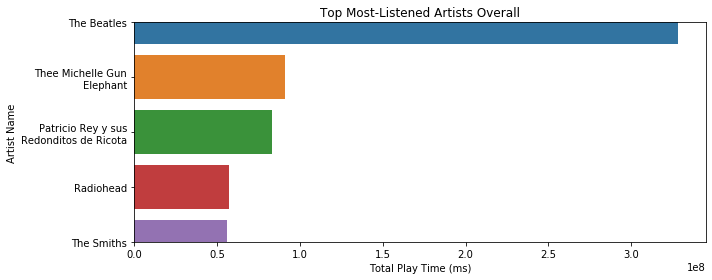

In [55]:
## Graph of the Most-Listened Artists ##
plt.figure(figsize=(10, 4))
ax = snsv.barplot(x='msPlayed', y='artistName', data=top_artists)
plt.title('Top Most-Listened Artists Overall')
plt.xlabel('Total Play Time (ms)')
plt.ylabel('Artist Name')

# Wrap the y-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
ax.set_yticks(ax.get_yticks()) # Set the ticks first
ax.set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

### **Performance Of The Most Listened-to Artists Monthly.**

To accomplish this, you need to create a grid that includes all top artists for each month. Then, join this grid with the `monthly_charts` data. This will ensure that every top artist has a row for every month, with `msPlayed` set to 0 for those who do not appear in the original monthly data.

In [56]:
# 1. Calculate the total listening time for all artists and get the top
top_artists_list = df.groupby('artistName')['msPlayed'].sum().nlargest(5).index

# 2. Filter the monthly charts using this list of top artists
monthly_charts = df.groupby(['month', 'artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()

top_artists_recorded = monthly_charts[monthly_charts['artistName'].isin(top_artists_list)]

print("\n#### Performance of the top-most listened artists overall in the first month: ####\n")
display(top_artists_recorded.head())


#### Performance of the top-most listened artists overall in the first month: ####



,month,artistName,msPlayed
516,1,Patricio Rey y sus Redonditos de Ricota,32353675
551,1,Radiohead,944091
663,1,The Beatles,2759773
691,1,The Smiths,4788639
701,1,Thee Michelle Gun Elephant,20961558


#### **📈 Visualization: Performance Of The Most Listened-to Artists Overall Per Month.**

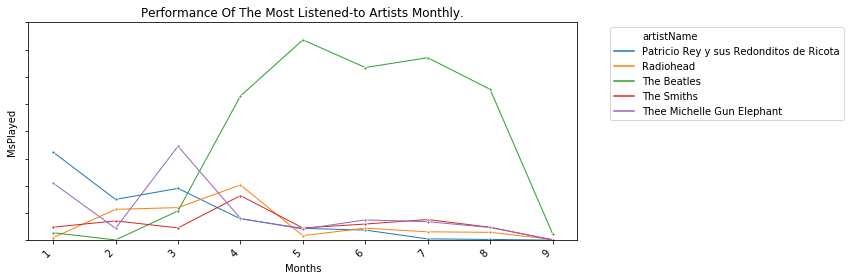

In [57]:
## Graph of the Most-Listened Artists per month ##

run_line_graph(
    data = top_artists_recorded,
    x = 'month',
    hue_data = 'artistName',
    data_title = 'Performance Of The Most Listened-to Artists Monthly.',
    xlabel = "Months",
    time = top_artists_recorded['month']
)


#### **What Were The Top Artists For Each Month?**

In [58]:
# Group by week and artist to get total count per artist per week
agg_artists_monthly = df.groupby(['month', 'artistName']).agg(msPlayed=('msPlayed', 'sum')).reset_index()

# Find the top artists by total count for each week
top_artists_per_month = agg_artists_monthly.groupby('month', group_keys=False).apply(lambda x: x.nlargest(5, 'msPlayed')).reset_index(drop=True)

# for month, group in top_artists_per_month.groupby('month'):
#     print(f"\n#### Top most-listened artists in month {month}: ####\n")
#     print(group)

#### **How Many Times The Most Listened-to Artists Appeared In The Top Weekly Lists?**

In [59]:
top_artists_in_monthly_charts = top_artists_per_month[top_artists_per_month['artistName'].isin(top_artists['artistName'])]

top_artists_in_monthly_charts = top_artists_in_monthly_charts.groupby('artistName').agg(
    msPlayed=('msPlayed', 'sum'),
    count=('month', 'size') 
).sort_values(by=['count', 'msPlayed'], ascending=[False, False]).reset_index()

total_months = len(df['month'].unique())
top_artists_in_monthly_charts['percentage_of_months_in_top'] = round((top_artists_in_monthly_charts["count"] / total_months) * 100, 2)

print("\n#### Times the most listened-to artists appeared in the top monthly lists: ####\n")
display(top_artists_in_monthly_charts)


#### Times the most listened-to artists appeared in the top monthly lists: ####



,artistName,msPlayed,count,percentage_of_months_in_top
0,The Beatles,314861993,6,66.67
1,Thee Michelle Gun Elephant,77779598,5,55.56
2,Radiohead,43928736,4,44.44
3,The Smiths,34429534,4,44.44
4,Patricio Rey y sus Redonditos de Ricota,66376090,3,33.33


#### **Who Were The Most Listened-To Artists On The Weekly Charts?**

In [60]:
top_artists_from_monthly_charts = top_artists_per_month.groupby(['artistName',]).agg(
    msPlayed=('msPlayed', 'sum'),
    count=('month', 'size') 
).sort_values(by=['count', 'msPlayed'], ascending=[False, False]).reset_index()

top_artists_from_monthly_charts = top_artists_from_monthly_charts.nlargest(5, 'count').reset_index(drop=True)
top_artists_from_monthly_charts['percentage_of_weeks_in_top'] = round((top_artists_from_monthly_charts["count"] / total_months) * 100, 2)

print("\n#### The most listened-to artists on the weekly charts: ####\n")
display(top_artists_from_monthly_charts)


#### The most listened-to artists on the weekly charts: ####



,artistName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,314861993,6,66.67
1,Thee Michelle Gun Elephant,77779598,5,55.56
2,Radiohead,43928736,4,44.44
3,David Bowie,37490194,4,44.44
4,The Smiths,34429534,4,44.44


#### 📈 Visualization: Performance Of The Most Listened-to Artists Monthly.

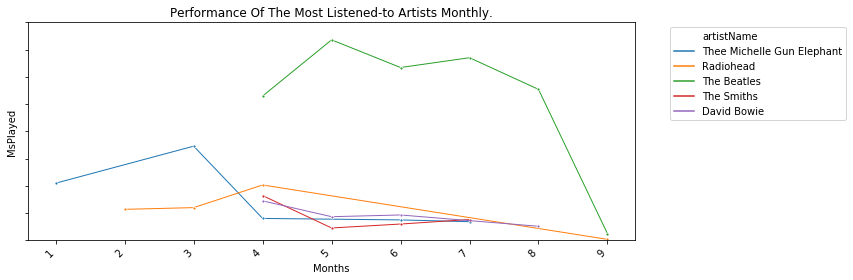

In [61]:
res = top_artists_per_month[top_artists_per_month["artistName"].isin(top_artists_from_monthly_charts["artistName"])]

run_line_graph(
    data = res,
    x = 'month',
    hue_data = 'artistName',
    data_title = 'Performance Of The Most Listened-to Artists Monthly.',
    xlabel = "Months",
    time = res['month']
)


#### **Differences Between The Top Artists By Listening Time and Weekly Charts.**

In [62]:
# Identify Entrants and Exits

# Artists that EXIT: Were in the Top by Listening Time, but fell out after the consistency weekly.
artists_exit = list(set(top_artists['artistName']) - set(top_artists_from_monthly_charts['artistName']))

# Artists that ENTER: Were outside the Top by Listening Time, but were boosted into the Top by consistency weekly.
artists_enter = list(set(top_artists_from_monthly_charts['artistName']) - set(top_artists['artistName']))

print(f"\n#### Artists that EXITED (Penalized for monthly Volatility): {artists_exit} ####\n")
print(f"\n#### Artists that ENTERED (Rewarded for monthly Consistency): {artists_enter} ####\n")


#### Artists that EXITED (Penalized for monthly Volatility): ['Patricio Rey y sus Redonditos de Ricota'] ####


#### Artists that ENTERED (Rewarded for monthly Consistency): ['David Bowie'] ####



#### **📈 Visualization:** Artists Who Entered And Exited The Top After Using Weekly Charts.

**1. Data Structuring for Plotting**

Create a temporary DataFrame containing only the moving artists and assign them a status label for color-coding the chart.

In [63]:
artists_to_plot = artists_exit + artists_enter

top_artists_monthly_recorded = agg_artists_monthly[agg_artists_monthly["artistName"].isin(artists_to_plot)]

#### **2. Generating the Line Chart**
Use a line chart to clearly contrast the penalized and rewarded artists based on weekly lists.

C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


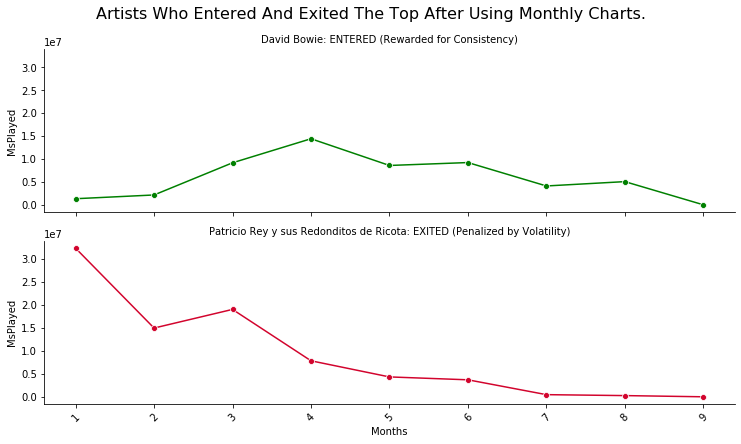

In [64]:
# Create a helper column to indicate the status (EXITED/ENTERED) for sorting purposes.
def get_classification(artist):
    if artist in artists_exit:  
        return "EXITED"
    elif artist in artists_enter:  
        return "ENTERED"
    return "N/A"

top_artists_monthly_recorded['classification'] = top_artists_monthly_recorded['artistName'].apply(get_classification)

# Add a column for the facet_title 
top_artists_monthly_recorded['facet_title'] = (
    top_artists_monthly_recorded['artistName'].astype(str) + 
    ': ' + 
    top_artists_monthly_recorded['classification'] + 
    top_artists_monthly_recorded['classification'].apply(lambda x: ' (Penalized by Volatility)' if x == 'EXITED' else ' (Rewarded for Consistency)')
)

run_subplots_graph(
    data = top_artists_monthly_recorded, 
    x_data = 'month', 
    axis_label = "Months", 
    suptitle = "Artists Who Entered And Exited The Top After Using Monthly Charts.", 
    xticks = top_artists_monthly_recorded['month']
)

#### **The Most Listened-to Tracks Overall (measured in msPlayed).**

In [65]:
top_tracks = df.groupby(['artistName',"trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()
top_tracks = top_tracks.sort_values(ascending=False, by="msPlayed").reset_index(drop=True).head(5)

print("\n#### Top most-listened tracks overall: ####\n")
display(top_tracks)


#### Top most-listened tracks overall: ####



,artistName,trackName,msPlayed
0,The Smiths,This Charming Man - 2011 Remaster,11196482
1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937
2,Oasis,Supersonic - Remastered,9764319
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722
4,The Beatles,Hey Jude - Remastered 2015,8385826


#### **📈 Visualization: Most-Listened Tracks Overall**

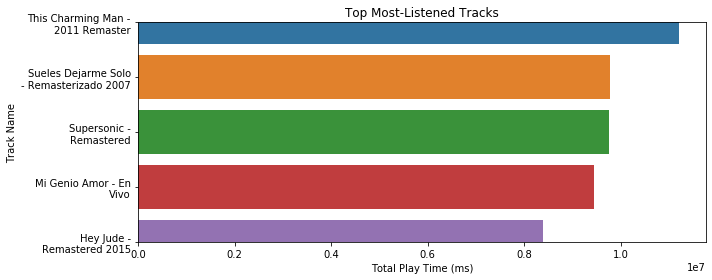

In [66]:
plt.figure(figsize=(10, 4))
ax = snsv.barplot(x='msPlayed', y='trackName', data=top_tracks)
plt.title('Top Most-Listened Tracks')
plt.xlabel('Total Play Time (ms)')
plt.ylabel('Track Name')

# Wrap the y-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_yticklabels()]
ax.set_yticks(ax.get_yticks()) # Set the ticks first
ax.set_yticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

#### **Percentage Of Time Spent Listening To The Top Tracks**

In [67]:
total_msPlayed = df['msPlayed'].sum()

pct_time_top_tracks = top_tracks

pct_time_top_tracks['percentage_of_time_listening'] = round((top_tracks["msPlayed"] / total_msPlayed) * 100, 2)

print("\n#### Percentage of time spent listening to the top tracks: ####\n")
display(pct_time_top_tracks[['artistName',"trackName","msPlayed","percentage_of_time_listening"]])


#### Percentage of time spent listening to the top tracks: ####



,artistName,trackName,msPlayed,percentage_of_time_listening
0,The Smiths,This Charming Man - 2011 Remaster,11196482,0.45
1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937,0.40
2,Oasis,Supersonic - Remastered,9764319,0.40
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722,0.38
4,The Beatles,Hey Jude - Remastered 2015,8385826,0.34


### **Performance Of The Most Listened-to Tracks Weekly.**

In [68]:
# 1. Calculate the total listening time for all tracks and get the top
top_tracks_list = df.groupby(['artistName', "trackName"])['msPlayed'].sum().nlargest(5).index

# 3. Calculate the monthly charts
weekly_charts = df.groupby(['week', 'artistName', "trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()

top_tracks_recorded = weekly_charts[
    weekly_charts.set_index(['artistName', 'trackName']).index.isin(top_tracks_list)
].reset_index(drop=True)

# 4. Sort the result for better visualization
top_tracks_recorded = top_tracks_recorded.sort_values(by=['week', 'msPlayed', "trackName"], ascending=[True, False, True]).reset_index(drop=True)

print("\n#### Performance of the top-most listened tracks overall in the first week: ####\n")
display(top_tracks_recorded.head())


#### Performance of the top-most listened tracks overall in the first week: ####



,week,artistName,trackName,msPlayed
0,2025-01-06/2025-01-12,Oasis,Supersonic - Remastered,1363210
1,2025-01-06/2025-01-12,The Smiths,This Charming Man - 2011 Remaster,1302654
2,2025-01-06/2025-01-12,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,2032
3,2025-01-13/2025-01-19,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,861999
4,2025-01-13/2025-01-19,The Smiths,This Charming Man - 2011 Remaster,624326


#### **📈 Visualization: Performance Of The Most Listened-to Tracks Monthly.**

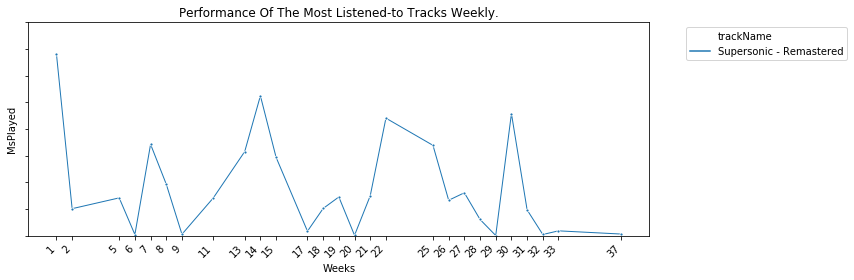

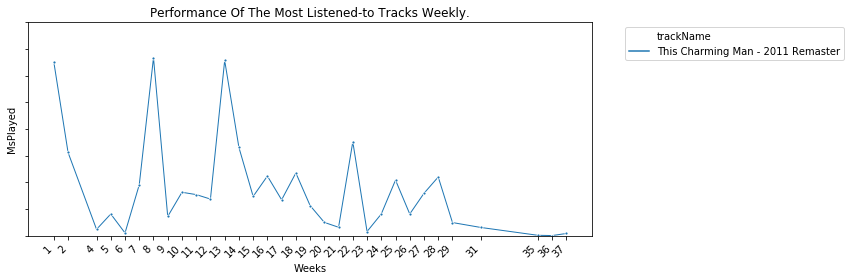

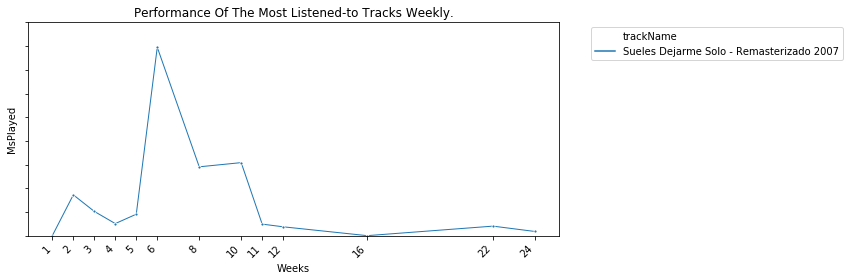

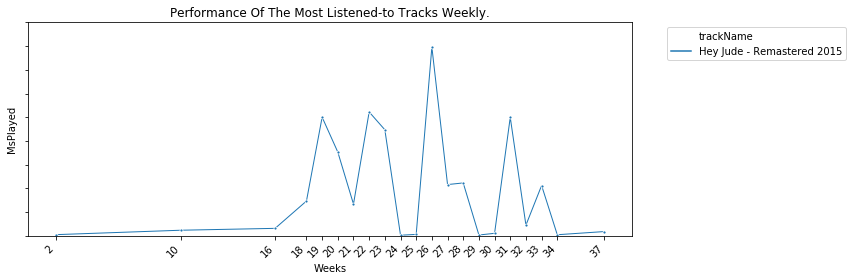

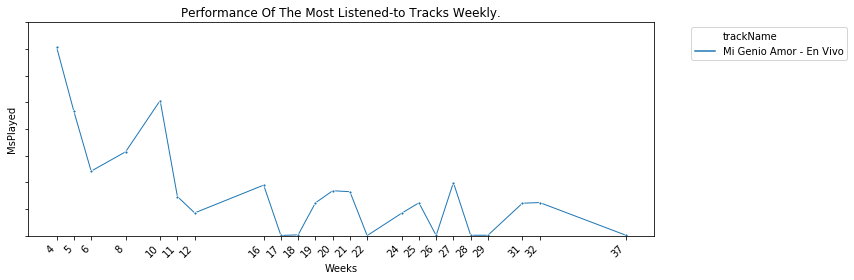

In [69]:
#  Get a list of all unique weeks
all_weeks = df['week'].astype(str).unique().tolist()

week_numbers_list = []
# Create pairs of (Original Month String, Sequential Number)
for week, i in zip(all_weeks, range(1, len(all_weeks) + 1)):  week_numbers_list.append([week, i])

week_to_number_map = dict(week_numbers_list)

top_tracks_recorded['sequential_week'] = top_tracks_recorded['week'].astype(str).map(week_to_number_map)

top_tracks_name = top_tracks_recorded[['artistName',"trackName"]].drop_duplicates().values



for track_name in top_tracks_name:
    
    # 1. FILTERED: Get the DataFrame for only the current artist
    mask = (top_tracks_recorded['artistName'] == track_name[0]) & \
           (top_tracks_recorded['trackName'] == track_name[1])
           
    df_target_track = top_tracks_recorded[mask].reset_index(drop=True) 
    
    run_line_graph(
      data = df_target_track,
       x = 'sequential_week',
       hue_data = 'trackName',
       data_title = 'Performance Of The Most Listened-to Tracks Weekly.',
       xlabel = "Weeks",
       time = df_target_track['sequential_week']
     )    

#### **What Were The Top Tracks For Each Week?**

In [70]:
# Group by week and track to get total count per week
agg_tracks_weekly = df.groupby(['week', 'artistName',"trackName"]).agg(msPlayed=('msPlayed', 'sum')).reset_index()

# Find the top tracks by total count for each week
top_tracks_per_week = agg_tracks_weekly.groupby('week', group_keys=False).apply(lambda x: x.nlargest(5, 'msPlayed')).reset_index(drop=True)

# for week, group in top_tracks_per_week.groupby('week'):
#     print(f"\n#### Top most-listened tracks in week {week}: ####\n")
#     print(group)

#### **How Many Times The Most Listened-to Tracks Appeared In The Top Weekly Lists?**

In [71]:
top_tracks['combined_key'] = list(zip(top_tracks['artistName'], top_tracks['trackName']))
top_tracks_per_week['combined_key'] = list(zip(top_tracks_per_week['artistName'], top_tracks_per_week['trackName']))

top_tracks_in_weekly_charts = top_tracks_per_week[top_tracks_per_week['combined_key'].isin(top_tracks['combined_key'])]

top_tracks_in_weekly_charts = top_tracks_in_weekly_charts.groupby(['artistName',"trackName"]).agg(
    msPlayed=('msPlayed', 'sum'),
    count=('combined_key', 'size') 
).sort_values(by=['count', 'msPlayed'], ascending=[False, False]).reset_index()

total_weeks = len(df['week'].unique())
top_tracks_in_weekly_charts['percentage_of_weeks_in_top'] = round((top_tracks_in_weekly_charts["count"] / total_weeks) * 100, 2)

print("\n#### Times the most listened-to tracks appeared in the top weekly lists?: ####\n")
display(top_tracks_in_weekly_charts)


#### Times the most listened-to tracks appeared in the top weekly lists?: ####



,artistName,trackName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,Hey Jude - Remastered 2015,4528894,4,10.81
1,The Smiths,This Charming Man - 2011 Remaster,3342202,3,8.11
2,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,5429491,2,5.41
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,2932279,2,5.41
4,Oasis,Supersonic - Remastered,2244984,2,5.41


#### **Who Were The Most Listened-To Tracks On The Weekly Charts?**

In [72]:
top_tracks_from_weekly_charts = top_tracks_per_week.groupby(['artistName',"trackName"]).agg(
    msPlayed=('msPlayed', 'sum'),
    count=('combined_key', 'size') 
).sort_values(by=['count', 'msPlayed'], ascending=[False, False]).reset_index()

top_tracks_from_weekly_charts = top_tracks_from_weekly_charts.nlargest(5, 'count').reset_index(drop=True)
top_tracks_from_weekly_charts['percentage_of_weeks_in_top'] = round((top_tracks_from_weekly_charts["count"] / total_weeks) * 100, 2)


print("\n#### The most listened-to tracks on the weekly charts: ####\n")
display(top_tracks_from_weekly_charts)


#### The most listened-to tracks on the weekly charts: ####



,artistName,trackName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,Hey Jude - Remastered 2015,4528894,4,10.81
1,David Bowie,Space Oddity - 2015 Remaster,3692385,3,8.11
2,The Smiths,This Charming Man - 2011 Remaster,3342202,3,8.11
3,The Beatles,Come Together - 2019 Mix,3190737,3,8.11
4,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,5429491,2,5.41


C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


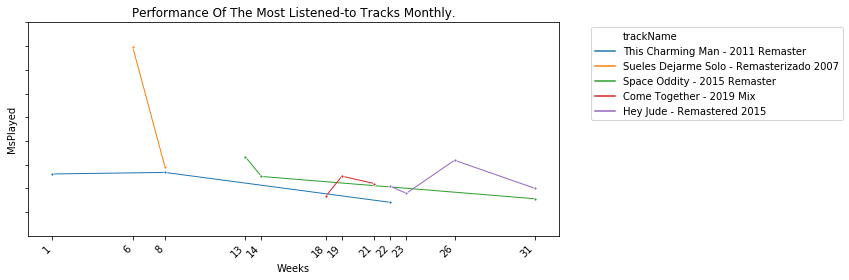

In [74]:
top_tracks_from_weekly_charts['combined_key'] = list(zip(top_tracks_from_weekly_charts['artistName'], top_tracks_from_weekly_charts['trackName']))

res = top_tracks_per_week[top_tracks_per_week['combined_key'].isin(top_tracks_from_weekly_charts['combined_key'])]

all_weeks = df['week'].astype(str).unique().tolist()

week_numbers_list = []
# Create pairs of (Original Month String, Sequential Number)
for week, i in zip(all_weeks, range(1, len(all_weeks) + 1)):  week_numbers_list.append([week, i])

week_to_number_map = dict(week_numbers_list)

res['sequential_week'] = res['week'].astype(str).map(week_to_number_map)

run_line_graph(
      data = res,
      x = 'sequential_week',
      hue_data = 'trackName',
      data_title = 'Performance Of The Most Listened-to Tracks Monthly.',
      xlabel = "Weeks",
      time = res['sequential_week']
)   

#### **Differences Between The Top Tracks By Listening Time and Weekly Charts.**

In [75]:
top_tracks_from_weekly_charts_copy = top_tracks_from_weekly_charts.copy()
top_tracks_copy = top_tracks.copy()

top_tracks_copy["combined_key"] = list(zip(top_tracks['artistName'], top_tracks['trackName']))
top_tracks_from_weekly_charts_copy["combined_key"] = list(zip(top_tracks_from_weekly_charts['artistName'], top_tracks_from_weekly_charts['trackName']))

# Identify Entrants and Exits

# Tracks that EXIT: Were in the Top by Listening Time, but fell out after the consistency weekly.
tracks_exit = list(set(top_tracks_copy['combined_key']) - set(top_tracks_from_weekly_charts_copy['combined_key']))

# Tracks that ENTER: Were outside the Top by Listening Time, but were boosted into the Top by consistency weekly.
tracks_enter = list(set(top_tracks_from_weekly_charts_copy['combined_key']) - set(top_tracks_copy['combined_key']))

print(f"\n#### Tracks that EXITED (Penalized for Weekly Volatility): {tracks_exit} ####\n")
print(f"\n#### Tracks that ENTERED (Rewarded for Weekly Consistency): {tracks_enter} ####\n")


#### Tracks that EXITED (Penalized for Weekly Volatility): [('Los Fundamentalistas del Aire Acondicionado', 'Mi Genio Amor - En Vivo'), ('Oasis', 'Supersonic - Remastered')] ####


#### Tracks that ENTERED (Rewarded for Weekly Consistency): [('The Beatles', 'Come Together - 2019 Mix'), ('David Bowie', 'Space Oddity - 2015 Remaster')] ####



In [76]:
tracks_to_plot = tracks_exit + tracks_enter

agg_tracks_weekly["combined_key"] = list(zip(agg_tracks_weekly['artistName'], agg_tracks_weekly['trackName'])) 

# 1. Get a list of all unique months
all_weeks = df['week'].astype(str).unique().tolist()
# agg_tracks_weekly['week'] = agg_tracks_weekly['week'].astype(str)

# # 2. Create a DataFrame with all combinations of top artists and months
# full_grid = pd.DataFrame(product(all_weeks, tracks_to_plot), columns=['week', "combined_key"])

# 3. Left merge the full grid with the monthly data
top_tracks_weekly_recorded = agg_tracks_weekly[agg_tracks_weekly["combined_key"].isin(tracks_to_plot)]

# 4. Fill NaN values with 0
top_tracks_weekly_recorded['msPlayed'] = top_tracks_weekly_recorded['msPlayed'].fillna(0)

week_numbers_list = []

# Create pairs of (Original Week String, Sequential Number)
for week, i in zip(all_weeks, range(1, len(all_weeks) + 1)):  week_numbers_list.append([week, i])

week_to_number_map = dict(week_numbers_list)

top_tracks_weekly_recorded['sequential_week'] = top_tracks_weekly_recorded['week'].astype(str).map(week_to_number_map)

C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\G3rrido\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


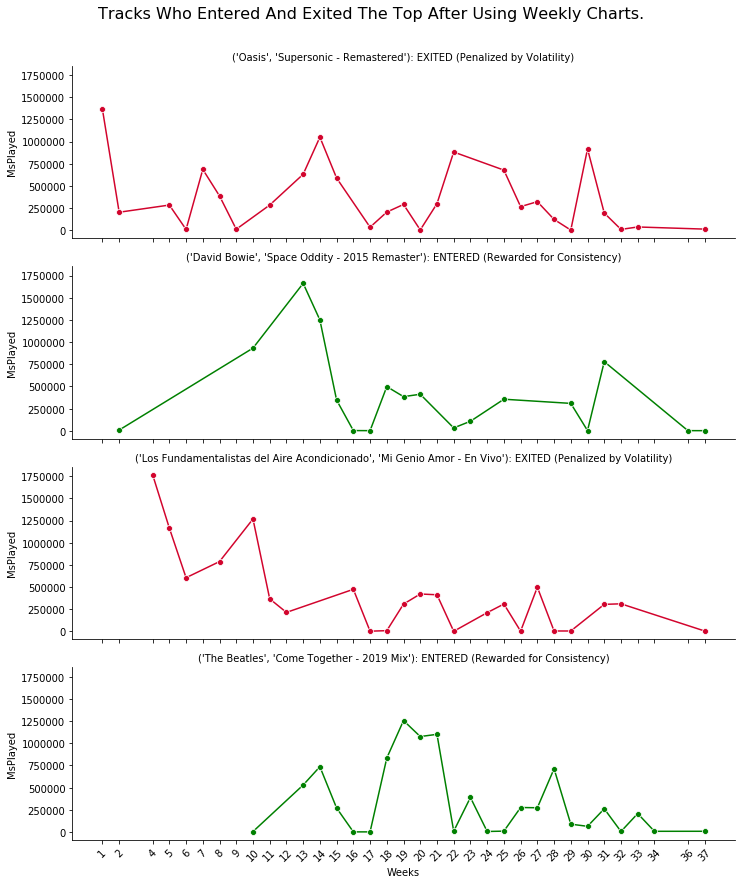

In [77]:
# Create a helper column to indicate the status (EXITED/ENTERED) for sorting purposes.
def get_classification(track):
    if track in tracks_exit:  
        return "EXITED"
    elif track in tracks_enter:  
        return "ENTERED"
    return "N/A"

top_tracks_weekly_recorded['classification'] = top_tracks_weekly_recorded['combined_key'].apply(get_classification)

# Add a column for the facet_title 
top_tracks_weekly_recorded['facet_title'] = (
    top_tracks_weekly_recorded['combined_key'].astype(str) + 
    ': ' + 
    top_tracks_weekly_recorded['classification'] + 
    top_tracks_weekly_recorded['classification'].apply(lambda x: ' (Penalized by Volatility)' if x == 'EXITED' else ' (Rewarded for Consistency)')
)



run_subplots_graph(
    data = top_tracks_weekly_recorded, 
    x_data = 'sequential_week', 
    axis_label = "Weeks", 
    suptitle = "Tracks Who Entered And Exited The Top After Using Weekly Charts.", 
    xticks = top_tracks_weekly_recorded['sequential_week']
)

#### Recapitulation
---

#### The Most Listened-to Artists Overall (measured in msPlayed).

In [78]:
display(top_artists)

,artistName,msPlayed,percentage_of_time_listening
0,The Beatles,328495363,13.29
1,Thee Michelle Gun Elephant,91063035,3.68
2,Patricio Rey y sus Redonditos de Ricota,83118557,3.36
3,Radiohead,56969054,2.30
4,The Smiths,55725821,2.25


#### Who Were The Most Listened-To Artists On The Monthly Charts? (Consistency Consumption)

In [79]:
display(top_artists_from_monthly_charts)

,artistName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,314861993,6,66.67
1,Thee Michelle Gun Elephant,77779598,5,55.56
2,Radiohead,43928736,4,44.44
3,David Bowie,37490194,4,44.44
4,The Smiths,34429534,4,44.44


#### Differences Between The Top Artists By Listening Time and Weekly Charts. (Consistency vs. Atypical Consumption)

In [80]:
print(f"Artists that EXITED (Penalized for monthly Volatility): {artists_exit}")
print(f"\nArtists that ENTERED (Rewarded for monthly Consistency): {artists_enter}")

Artists that EXITED (Penalized for monthly Volatility): ['Patricio Rey y sus Redonditos de Ricota']

Artists that ENTERED (Rewarded for monthly Consistency): ['David Bowie']


#### The Most Listened-to Tracks Overall (measured in msPlayed).

In [81]:
display(top_tracks[["artistName","trackName","msPlayed","percentage_of_time_listening"]])

,artistName,trackName,msPlayed,percentage_of_time_listening
0,The Smiths,This Charming Man - 2011 Remaster,11196482,0.45
1,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,9782937,0.40
2,Oasis,Supersonic - Remastered,9764319,0.40
3,Los Fundamentalistas del Aire Acondicionado,Mi Genio Amor - En Vivo,9449722,0.38
4,The Beatles,Hey Jude - Remastered 2015,8385826,0.34


#### Who Were The Most Listened-To Tracks On The Weekly Charts? (Consistency Consumption)

In [82]:
display(top_tracks_from_weekly_charts[["artistName","trackName","msPlayed","count","percentage_of_weeks_in_top"]])

,artistName,trackName,msPlayed,count,percentage_of_weeks_in_top
0,The Beatles,Hey Jude - Remastered 2015,4528894,4,10.81
1,David Bowie,Space Oddity - 2015 Remaster,3692385,3,8.11
2,The Smiths,This Charming Man - 2011 Remaster,3342202,3,8.11
3,The Beatles,Come Together - 2019 Mix,3190737,3,8.11
4,Soda Stereo,Sueles Dejarme Solo - Remasterizado 2007,5429491,2,5.41


#### Differences Between The Top Tracks By Listening Time and Weekly Charts. (Consistency vs. Atypical Consumption)

In [83]:
print(f"Tracks that EXITED (Penalized for Weekly Volatility): {tracks_exit}")
print(f"\nTracks that ENTERED (Rewarded for Weekly Consistency): {tracks_enter}")

Tracks that EXITED (Penalized for Weekly Volatility): [('Los Fundamentalistas del Aire Acondicionado', 'Mi Genio Amor - En Vivo'), ('Oasis', 'Supersonic - Remastered')]

Tracks that ENTERED (Rewarded for Weekly Consistency): [('The Beatles', 'Come Together - 2019 Mix'), ('David Bowie', 'Space Oddity - 2015 Remaster')]


#### **First Impressions:**

- The top five artists were responsible for approximately 25% of the total listening time this year to date.
- In contrast, the top five most-streamed songs accounted for only 2% of the overall listening time year to date.
- The dataframe contains 37 weeks of listening history, but only two or three weeks at the top are needed to consistently rank among the most listened-to songs.

#### Initial Conclusion:


#### More reliable methods are necessary to identify the "most consistently played" songs rather than just counting their appearances in weekly or monthly top charts.